# Rede Neuronal

Neste ficheiro encontras-se o código relacionado com a implementação da Rede Neuronal e os resultados dos seus testes

In [21]:
import pandas as pd
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

covid_data = pd.read_csv('google_new3.csv',sep=";")

## Análise de Dados

Nesta secção do código realizamos um breve análise dos dados fornecidos.

In [22]:
str_column =['iso','country']
target_column = ['total_cases','fatalities'] 
predictors = list(set(list(covid_data.columns))-set(target_column)-set(str_column))
covid_data[predictors] = covid_data[predictors]
print(covid_data.columns)
covid_data.describe().transpose()

Index(['iso', 'country', 'date', 'grocery_pharmacy', 'parks', 'residential',
       'retail_recreation', 'transit_stations', 'workplaces', 'total_cases',
       'fatalities'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
date,817.0,22.000000,12.417275,1.000,11.000,22.000,33.000,43.000
grocery_pharmacy,817.0,-8.229424,21.313369,-84.798,-16.578,0.088,4.838,59.474
parks,817.0,-13.394035,32.891636,-91.456,-32.841,-6.498,6.961,75.002
residential,817.0,9.545845,10.545377,-3.647,0.744,5.912,16.695,40.343
retail_recreation,817.0,-26.205257,30.992728,-95.158,-49.975,-14.427,-0.632,19.699
transit_stations,817.0,-28.370122,30.211025,-88.956,-54.145,-19.502,-0.970,16.822
workplaces,817.0,-19.126192,25.983021,-79.293,-40.582,-8.395,1.037,21.347
total_cases,817.0,10699.773562,31656.464952,0.000,27.000,648.000,4585.000,336912.000
fatalities,817.0,566.007344,2008.520488,0.000,0.000,6.000,79.000,15887.000


### Agrupamento de Dados

Agrupamos os dados dos vários países por continente

In [23]:
EU_covid_data = covid_data.loc[((covid_data['country'] == 'Germany') 
                               | (covid_data['country'] == 'Spain')
                               | (covid_data['country'] == 'France')
                               | (covid_data['country'] == 'United Kingdom')
                               | (covid_data['country'] == 'Italy')
                               | (covid_data['country'] == 'Sweden'))]

AM_covid_data = covid_data.loc[((covid_data['country'] == 'Argentina')
                                | (covid_data['country'] == 'Canada')
                                | (covid_data['country'] == 'Mexico')
                                | (covid_data['country'] == 'US')
                                | (covid_data['country'] == 'Brazil'))]

AS_OC_covid_data = covid_data.loc[((covid_data['country'] == 'Indonesia')
                               | (covid_data['country'] == 'India')
                               | (covid_data['country'] == 'Japan')
                               | (covid_data['country'] == 'South Korea')
                               | (covid_data['country'] == 'Australia'))]

AF_covid_data = covid_data.loc[((covid_data['country'] == 'South Africa') 
                                | (covid_data['country'] == 'Saudi Arabia')
                                | (covid_data['country'] == 'Turkey'))]

## Criação do Modelo

Nesta secção treinamos a nossa rede Neuronal.

### Divisão dos dados

Dividimos os dados fornecidos para os testes e para o treino

In [24]:
X=EU_covid_data[predictors]
Y1=EU_covid_data["total_cases"]
Y2=EU_covid_data["fatalities"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.30, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.30, random_state=10)

print(X_train.shape)
print(X_test.shape)

(180, 7)
(78, 7)


### Treino do modelo 

Nesta secção treinamos o modelo com os dados para treino.

In [25]:
mlp = MLPRegressor(hidden_layer_sizes=(10,6), activation='relu', solver='lbfgs', max_iter=5000 ,random_state=40,alpha=0.0001)
mlp.fit(X1_train,y1_train)

predict_train = mlp.predict(X1_train)
predict_test = mlp.predict(X1_test)

print(mean_squared_error(y1_train,predict_train))
print(r2_score(y1_train,predict_train))

print(mean_squared_error(y1_test,predict_test))
print(r2_score(y1_test,predict_test))

94667283.85126464
0.9138658924392112
136727123.76509154
0.8642355053393362


### Score do treino

In [26]:
mlp.fit(X2_train,y2_train)

predict_train2 = mlp.predict(X2_train)
predict_test2 = mlp.predict(X2_test)

print(mean_squared_error(y2_train,predict_train2))
print(r2_score(y2_train,predict_train2))

print(mean_squared_error(y2_test,predict_test2))
print(r2_score(y2_test,predict_test2))

472229.6363724566
0.9519159025624523
1003458.4022344783
0.9104631757036195


### Representação gráfica

Nesta secção representamos os valores previstos da rede neuronal para os vários valores de variação das localidades.

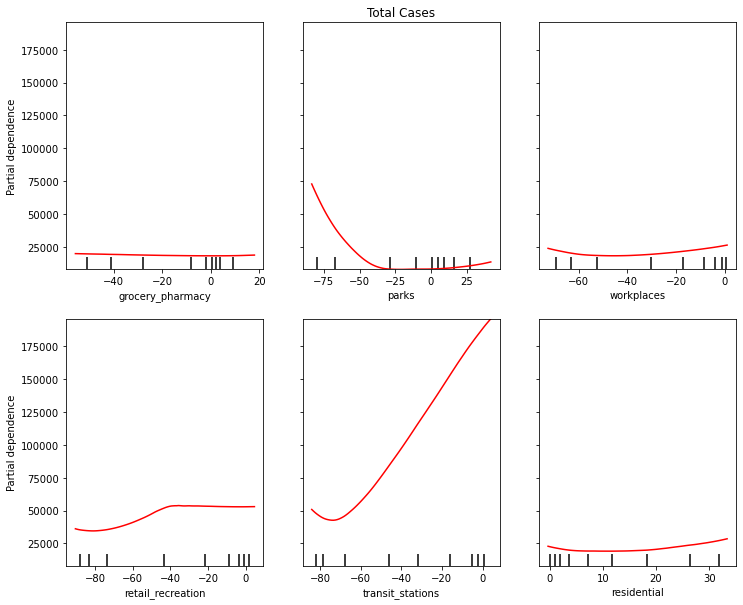

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence
from sklearn.pipeline import make_pipeline

X=EU_covid_data[predictors]
Y1=EU_covid_data["total_cases"]
Y2=EU_covid_data["fatalities"]


mlp = make_pipeline(StandardScaler(),
                     MLPRegressor(hidden_layer_sizes=(10,6), activation='relu', solver='lbfgs', max_iter=5000 ,random_state=40,alpha=0.0001))
mlp.fit(X, Y1)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Total Cases")
mlp_disp = plot_partial_dependence(mlp, X, ['grocery_pharmacy', 'parks', 'workplaces', 'retail_recreation', 'transit_stations','residential'], ax=ax,
                                   line_kw={"c": "red"})

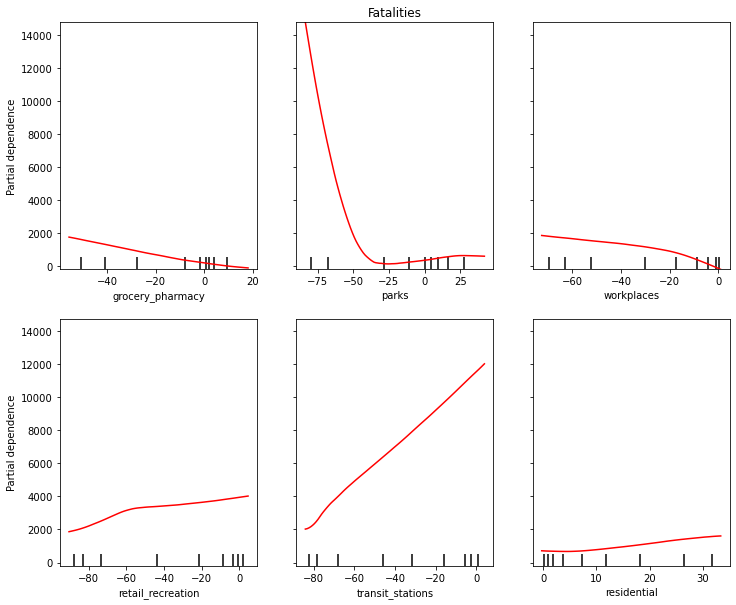

In [28]:
mlp.fit(X, Y2)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Fatalities")
mlp_disp = plot_partial_dependence(mlp, X, ['grocery_pharmacy', 'parks', 'workplaces', 'retail_recreation', 'transit_stations','residential'], ax=ax,
                                   line_kw={"c": "red"})

In [29]:
regr_2 =  MLPRegressor(hidden_layer_sizes=(10,6), activation='relu', solver='lbfgs', max_iter=5000 ,random_state=40,alpha=0.0001)

regr_2.fit(EU_covid_data[['date']], EU_covid_data['total_cases'])



MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 6), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=40, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

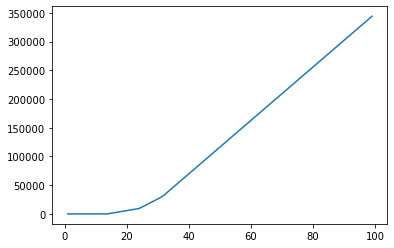

In [30]:
import numpy as np

b=np.arange(1,100)
a=np.arange(1,100)

for i in range(99):
    b[i]=regr_2.predict([[a[i]]])[0]
    
plt.plot(a,b)
    


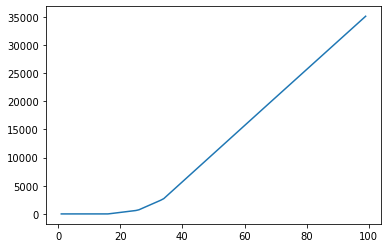

In [31]:
regr_2.fit(EU_covid_data[['date']], EU_covid_data['fatalities'])

b=np.arange(1,100)
a=np.arange(1,100)

for i in range(99):
    b[i]=regr_2.predict([[a[i]]])[0]
    
plt.plot(a,b)